    Import the requiered python libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warning
warnings.filterwarnings('ignore')

start the data cleaning process

In [7]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.3f}".format
df = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=['?', None])
.csv')

In [8]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Retrieve the name of the column

In [16]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

The size of the data

In [9]:
df.size

8250055

To get the shape of data(rows x columns)

In [10]:
df.shape

(150001, 55)

datatypes of each columns

In [11]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [12]:
# to print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [13]:
#generate some descriptive statistics, by excluding Nan values
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


# Handling Missing values

In [14]:
def missing_values(dframe):
    # calculate total number of cells
    total_cells = np.product(dframe.shape)
    # count number of each values of each of columns
    missing_count = dframe.isnull().sum()
    # calculate total number of missing values
    total_missing = missing_count.sum()
    # Calculate percentage of missing values
    print("The telecom-industry dataset contains", round(((total_missing/total_cells) * 100), 2), "%", "missing values.")
    
missing_values(df)

The telecom-industry dataset contains 12.5 % missing values.


to know which column has missing value

In [15]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Calculate percentage of missing values per columns

In [16]:
round(((df.isna().sum()) * 100) / len(df), 4)
    

Bearer Id                                    0.6607
Start                                        0.0007
Start ms                                     0.0007
End                                          0.0007
End ms                                       0.0007
Dur. (ms)                                    0.0007
IMSI                                         0.3800
MSISDN/Number                                0.7107
IMEI                                         0.3813
Last Location Name                           0.7687
Avg RTT DL (ms)                             18.5525
Avg RTT UL (ms)                             18.5412
Avg Bearer TP DL (kbps)                      0.0007
Avg Bearer TP UL (kbps)                      0.0007
TCP DL Retrans. Vol (Bytes)                 58.7636
TCP UL Retrans. Vol (Bytes)                 64.4322
DL TP < 50 Kbps (%)                          0.5027
50 Kbps < DL TP < 250 Kbps (%)               0.5027
250 Kbps < DL TP < 1 Mbps (%)                0.5027
DL TP > 1 Mb

In [17]:
#drop columns with more than 50% missing valuesNb of sec with 31250B < Vol DL < 125000B
df_clean = df.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
                   'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
                   'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [18]:
df_clean.shape

(150001, 45)

In [22]:
# check the skewness of each column
df_clean.skew(axis=0, skipna=True)

C:\Users\Machine\AppData\Local\Temp\ipykernel_16000\3113696307.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean.skew(axis=0, skipna=True)


Bearer Id                           0.026666
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec 

In [23]:
# fill catagorical/object dtype column with mode 
df_clean['Start'] = df_clean['Start'].fillna(df_clean['Start'].mode()[0])
df_clean['End'] = df_clean['End'].fillna(df_clean['End'].mode()[0])
df_clean['Last Location Name'] = df_clean['Last Location Name'].fillna(df_clean['Last Location Name'].mode()[0])
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])

In [24]:
# fill missing values using median(skewed and numeric dtypes)

df_clean['Start ms'] = df_clean['Start ms'].fillna(df_clean['Start ms'].median())
df_clean['End ms'] = df_clean['End ms'].fillna(df_clean['End ms'].median())
df_clean['Dur. (ms)'] = df_clean['Dur. (ms)'].fillna(df_clean['Dur. (ms)'].median())
df_clean['Dur. (ms).1'] = df_clean['Dur. (ms).1'].fillna(df_clean['Dur. (ms).1'].median())
df_clean['Avg Bearer TP DL (kbps)'] = df_clean['Avg Bearer TP DL (kbps)'].fillna(df_clean['Avg Bearer TP DL (kbps)'].median())
df_clean['Avg Bearer TP UL (kbps)'] = df_clean['Avg Bearer TP UL (kbps)'].fillna(df_clean['Avg Bearer TP UL (kbps)'].median())
df_clean['Activity Duration DL (ms)'] = df_clean['Activity Duration DL (ms)'].fillna(df_clean['Activity Duration DL (ms)'].median())
df_clean['Activity Duration UL (ms)'] = df_clean['Activity Duration UL (ms)'].fillna(df_clean['Activity Duration UL (ms)'].median())
df_clean['Total UL (Bytes)'] = df_clean['Total UL (Bytes)'].fillna(df_clean['Total UL (Bytes)'].median())
df_clean['Total DL (Bytes)'] = df_clean['Total DL (Bytes)'].fillna(df_clean['Total DL (Bytes)'].median())


In [25]:
# fill missing values using forward fill
def fix_miss_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

def fix_miss_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Avg RTT DL (ms)'] = fix_miss_ffill(df_clean, 'Avg RTT DL (ms)')
df_clean['Avg RTT UL (ms)'] = fix_miss_ffill(df_clean, 'Avg RTT UL (ms)')
df_clean['Bearer Id'] = fix_miss_ffill(df_clean, 'Bearer Id')
df_clean['MSISDN/Number'] = fix_miss_ffill(df_clean, 'MSISDN/Number')
df_clean['IMSI'] = fix_miss_ffill(df_clean, 'IMSI')
df_clean['IMEI'] = fix_miss_ffill(df_clean, 'IMEI')                                          
                                            

In [26]:
df_clean['DL TP < 50 Kbps (%)'] = fix_miss_bfill(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fix_miss_bfill(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fix_miss_bfill(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['DL TP > 1 Mbps (%)'] = fix_miss_bfill(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fix_miss_bfill(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fix_miss_bfill(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fix_miss_bfill(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fix_miss_bfill(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_miss_bfill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_miss_bfill(df_clean, 'Nb of sec with Vol UL < 1250B')

In [27]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               1
50 Kbps < DL TP < 250 Kbps (%)    1
250 Kbps < DL TP < 1 Mbps (%)     1
DL TP > 1 Mbps (%)                1
UL TP < 10 Kbps (%)               1
10 Kbps < UL TP < 50 Kbps (%)     1
50 Kbps < UL TP < 300 Kbps (%)    1
UL TP > 300 Kbps (%)              1
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [28]:
# still there are some missing values, fill with median
def fill_with_median(df, col):
    df[col] = df[col].fillna(df[col].median())
    return df[col]

df_clean['DL TP < 50 Kbps (%)'] = fill_with_median(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fill_with_median(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fill_with_median(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['DL TP > 1 Mbps (%)'] = fill_with_median(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fill_with_median(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fill_with_median(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fill_with_median(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fill_with_median(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['Nb of sec with Vol DL < 6250B'] = fill_with_median(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['Nb of sec with Vol UL < 1250B'] = fill_with_median(df_clean, 'Nb of sec with Vol UL < 1250B')

In [29]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [30]:
df_clean.shape

(150001, 45)

# Tranforming Data

Scaling and Normalization

In [31]:
df_clean.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         

In [33]:
# convert categorical data to numberic using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
df_clean['Start'] = lb.fit_transform(df_clean['Start'])
df_clean['End'] = lb.fit_transform(df_clean['End'])
df_clean['Last Location Name'] = lb.fit_transform(df_clean['Last Location Name'])
df_clean['Handset Manufacturer'] = lb.fit_transform(df_clean['Handset Manufacturer'])
df_clean['Handset Type'] = lb.fit_transform(df_clean['Handset Type'])

In [34]:
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,9989,770.0,131,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,350,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,9990,235.0,475,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,26827,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,9994,1.0,125,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,9057,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,0,486.0,472,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,31167,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,15,565.0,122,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,15590,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [36]:
# perform min max scalling
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [39]:
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1241,202.129965
492,23.754097
0,71.797383
1290,111.259539
309,111.150319


In [40]:
original_data[0].min(), original_data[0].max()

(0.04857801453964526, 1414.8562812564055)

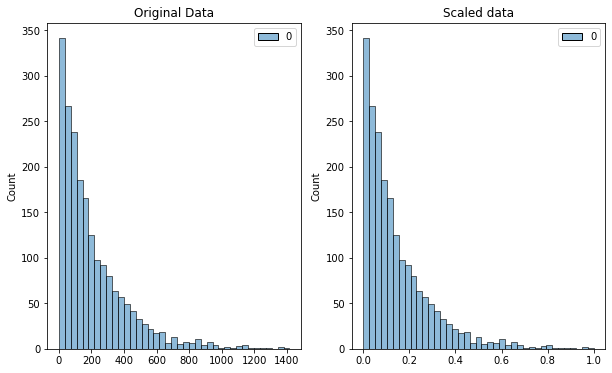

In [41]:
def min_max_scaler(df_clean):
    scaled_data = minmax_scaler.fit_transform(df_clean)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
min_max_scaler(original_data)

In [46]:
# retrieve the scaled data
df_scaler = pd.DataFrame(minmax_scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaler.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0.988506,0.999300,0.770771,0.020462,0.662663,0.980734,0.414307,7.248772e-08,0.355933,0.007685,...,0.681651,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846
1,0.988506,0.999400,0.235235,0.074196,0.606607,0.733164,0.414353,9.163195e-08,0.358701,0.589009,...,0.870515,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401
2,0.988506,0.999800,0.001001,0.019525,0.652653,0.731360,0.414194,1.809066e-07,0.353501,0.198854,...,0.848083,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394
3,0.988506,0.000000,0.486486,0.073727,0.171171,0.709627,0.414303,1.692516e-07,0.354263,0.684297,...,0.919559,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439
4,0.988506,0.001501,0.565566,0.019057,0.954955,0.584100,0.414303,1.119654e-07,0.354774,0.342291,...,0.656060,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361


In [47]:
# perform normalization
from sklearn import preprocessing
d = preprocessing.normalize(df_clean)
df_normal = pd.DataFrame(d, columns=df_clean.columns)

In [48]:
df_normal.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.0,7.616770e-16,5.871371e-17,9.988956e-18,5.047854e-17,1.390563e-13,0.000016,2.567006e-09,0.000003,2.668805e-17,...,1.208939e-12,1.907305e-13,6.251818e-13,7.363043e-13,2.120421e-11,1.093764e-12,1.309578e-11,6.721113e-13,2.802226e-12,2.355256e-11
1,1.0,7.617532e-16,1.791912e-17,3.621950e-17,4.620845e-17,1.040913e-13,0.000016,2.568294e-09,0.000003,2.045601e-15,...,1.543896e-12,1.457299e-12,1.398333e-12,1.313596e-12,4.641815e-11,8.926840e-14,4.017728e-11,1.147978e-12,4.102364e-12,4.982163e-11
2,1.0,7.620582e-16,7.625157e-20,9.531447e-18,4.971603e-17,1.038365e-13,0.000016,2.574301e-09,0.000003,6.906105e-16,...,1.504113e-12,1.120866e-12,1.341097e-12,4.699696e-13,1.750619e-11,3.016741e-14,3.131596e-11,3.214586e-13,2.126171e-12,2.133575e-11
3,1.0,0.000000e+00,3.705826e-17,3.599074e-17,1.303902e-17,1.007671e-13,0.000016,2.573517e-09,0.000003,2.376533e-15,...,1.630878e-12,1.154955e-12,1.067114e-12,8.371980e-14,6.096604e-11,8.273084e-13,5.711547e-11,9.758130e-13,3.303540e-12,6.451101e-11
4,1.0,1.143774e-18,4.308214e-17,9.302692e-18,7.274400e-17,8.303865e-14,0.000016,2.569662e-09,0.000003,1.188762e-15,...,1.163552e-12,1.445949e-12,1.305776e-12,3.166103e-14,4.023851e-11,2.691529e-13,4.199247e-11,1.060684e-12,2.938950e-12,4.339771e-11


In [49]:
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,9989,770.0,131,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,350,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,9990,235.0,475,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,26827,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,9994,1.0,125,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,9057,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,0,486.0,472,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,31167,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,15,565.0,122,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,15590,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
